In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal


Using TensorFlow backend.


In [0]:
%matplotlib notebook
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
X_test.shape[0]

10000

In [0]:
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
X_test.shape

(10000, 784)

In [8]:
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

print(Y_train.shape)
print(Y_test.shape)


Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)
(10000, 10)


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.initializers import he_normal


<h1> 2 layer without dropout and BN </h1>

In [31]:
model = Sequential()
model.add(Dense(256, activation = 'relu',kernel_initializer = he_normal(seed= None), input_shape=(input_dim,))) #layer1
model.add(Dense(64, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer2 
model.add(Dense(output_dim, activation = 'softmax')) #softmax

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_36 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_37 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [32]:
model. compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.2841 - acc: 0.9176 - val_loss: 0.1354 - val_acc: 0.9593
Epoch 2/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1086 - acc: 0.9676 - val_loss: 0.0933 - val_acc: 0.9725
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0716 - acc: 0.9789 - val_loss: 0.0767 - val_acc: 0.9759
Epoch 4/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0503 - acc: 0.9847 - val_loss: 0.0747 - val_acc: 0.9759
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0388 - acc: 0.9883 - val_loss: 0.0835 - val_acc: 0.9747
Epoch 6/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0297 - acc: 0.9907 - val_loss: 0.0671 - val_acc: 0.9804
Epoch 7/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0229 - acc: 0.9928 - val_loss: 0.0747 - val_acc

In [33]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.08757703835445936
Test accuracy: 0.9796


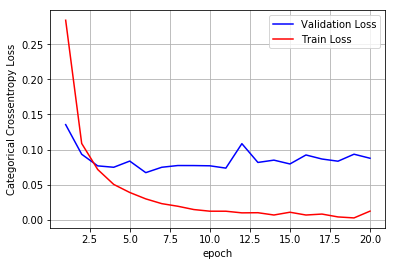

In [34]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

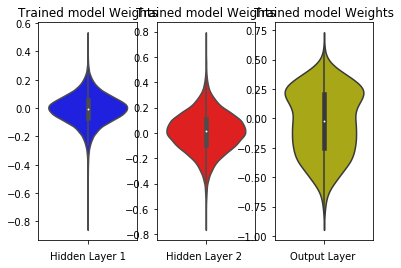

In [35]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1> 2-layer with BN</h1>

In [0]:
from keras.layers.normalization import BatchNormalization


In [36]:
model = Sequential()
model.add(Dense(256, activation = 'relu',kernel_initializer = he_normal(seed= None), input_shape=(input_dim,))) #layer1
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer2 
model.add(BatchNormalization())
model.add(Dense(output_dim, activation = 'softmax')) #softmax

model.summary()

model. compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
dense_39 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_12 (Batc (None, 64)                256       
_________________________________________________________________
dense_40 (Dense)             (None, 10)                650       
Total params: 219,338
Trainable params: 218,698
Non-trainable params: 640
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 

In [37]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.10127146904087385
Test accuracy: 0.9772


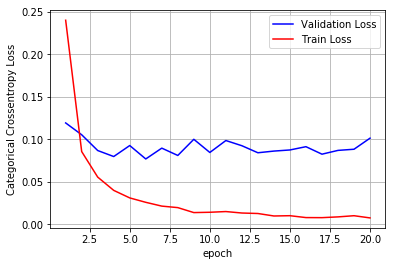

In [38]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

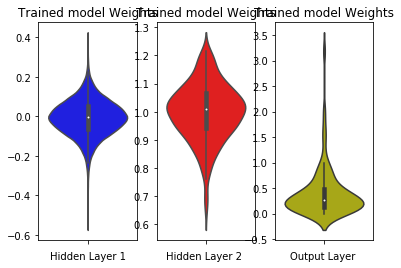

In [39]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1> 2-layer with BN and Dropout</h1>

In [0]:
from keras.layers import Dropout

In [41]:
model = Sequential()
model.add(Dense(256, activation = 'relu',kernel_initializer = he_normal(seed= None), input_shape=(input_dim,))) #layer1
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer2 
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation = 'softmax')) #softmax

model.summary()

model. compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_14 (Batc (None, 64)                256       
_________________________________________________________________
dropout_24 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)              

In [42]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.06838880909688305
Test accuracy: 0.9793


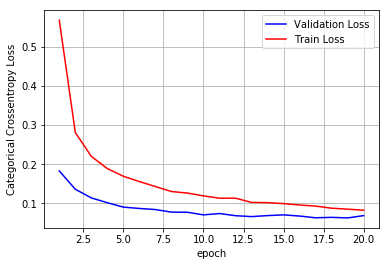

In [43]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

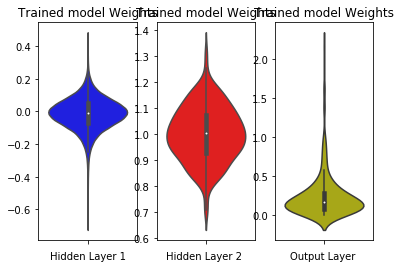

In [44]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1> 3-layer MLP</h1>

In [45]:
model = Sequential()
model.add(Dense(512, activation = 'relu',kernel_initializer = he_normal(seed= None), input_shape=(input_dim,))) #layer1
model.add(Dense(256, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer2 
model.add(Dense(128, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer3 
model.add(Dense(output_dim, activation = 'softmax')) #softmax

model.summary()

model. compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_45 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_46 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.2240 - acc: 0.9335 - val_loss: 0.1042 - val_acc: 0.9676
Epoch 2/20
60000/60000 [==============================] -

In [50]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.07596459169010378
Test accuracy: 0.9833


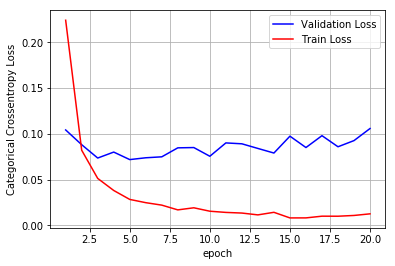

In [47]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

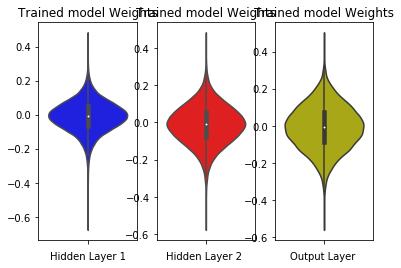

In [48]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1> 3-layer with BN </h1>

In [49]:
model = Sequential()
model.add(Dense(512, activation = 'relu',kernel_initializer = he_normal(seed= None), input_shape=(input_dim,))) #layer1
model.add(BatchNormalization())
model.add(Dense(256, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer2 
model.add(BatchNormalization())
model.add(Dense(128, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer3
model.add(BatchNormalization())
model.add(Dense(output_dim, activation = 'softmax')) #softmax

model.summary()

model. compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)               2048      
_________________________________________________________________
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
dense_50 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_17 (Batc (None, 128)               512       
_________________________________________________________________
dense_51 (Dense)             (None, 10)              

In [51]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])




Test score: 0.07596459169010378
Test accuracy: 0.9833


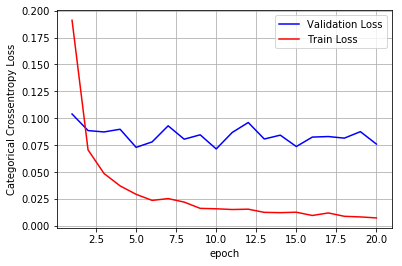

In [52]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

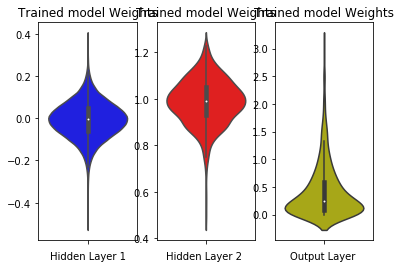

In [53]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1> 3-layer with BN and Dropout </h1>

In [54]:
model = Sequential()
model.add(Dense(512, activation = 'relu',kernel_initializer = he_normal(seed= None), input_shape=(input_dim,))) #layer1
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer2 
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer3
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation = 'softmax')) #softmax

model.summary()

model. compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_18 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)             

In [55]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])




Test score: 0.06024500147026847
Test accuracy: 0.9827


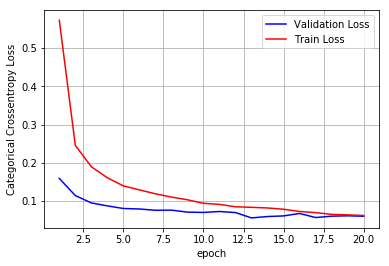

In [56]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

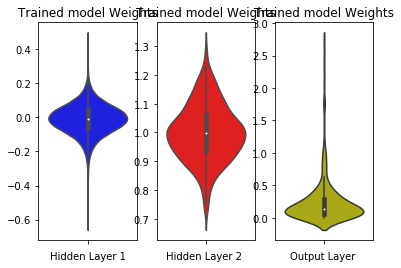

In [57]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1> 5 layer MLP without BN and Dropout </h1>

In [58]:
model = Sequential()
model.add(Dense(512, activation = 'relu',kernel_initializer = he_normal(seed= None), input_shape=(input_dim,))) #layer1
model.add(Dense(256, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer2 
model.add(Dense(128, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer3
model.add(Dense(64, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer4 
model.add(Dense(32, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer5 

model.add(Dense(output_dim, activation = 'softmax')) #softmax

model.summary()

model. compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_57 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_58 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_59 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_60 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_61 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [60]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.09418808573480855
Test accuracy: 0.9789


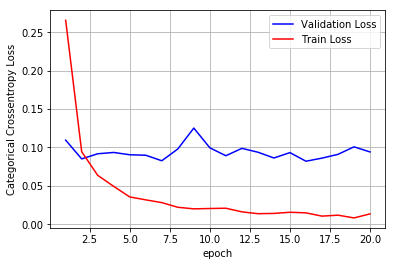

In [61]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

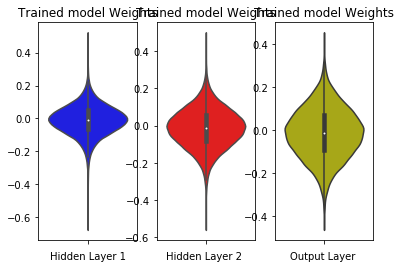

In [62]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1> 5-layer MLP with BN </h1>

In [63]:
model = Sequential()
model.add(Dense(512, activation = 'relu',kernel_initializer = he_normal(seed= None), input_shape=(input_dim,))) #layer1
model.add(BatchNormalization())
model.add(Dense(256, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer2 
model.add(BatchNormalization())
model.add(Dense(128, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer3
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer4
model.add(BatchNormalization())
model.add(Dense(32, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer5 
model.add(BatchNormalization())
model.add(Dense(output_dim, activation = 'softmax')) #softmax

model.summary()

model. compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_21 (Batc (None, 512)               2048      
_________________________________________________________________
dense_63 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_22 (Batc (None, 256)               1024      
_________________________________________________________________
dense_64 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_23 (Batc (None, 128)               512       
_________________________________________________________________
dense_65 (Dense)             (None, 64)              

In [66]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.06554562079786556
Test accuracy: 0.9833


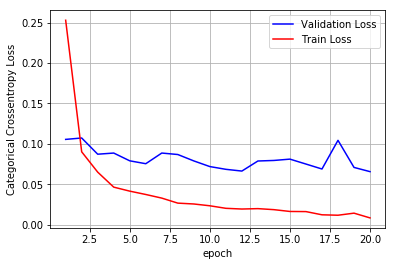

In [67]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

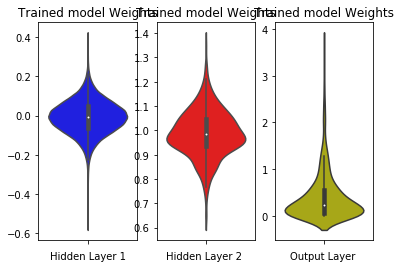

In [68]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1> 5-layer MLP with BN and Dropout </h1>

In [69]:
model = Sequential()
model.add(Dense(512, activation = 'relu',kernel_initializer = he_normal(seed= None), input_shape=(input_dim,))) #layer1
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer2 
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer3
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer4
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu',kernel_initializer = he_normal(seed= None))) #layer5
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation = 'softmax')) #softmax

model.summary()

model. compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_26 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_27 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_29 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 128)             

In [70]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.09161197890958284
Test accuracy: 0.9795


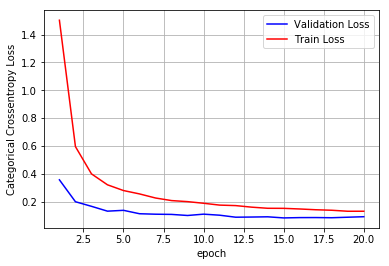

In [71]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

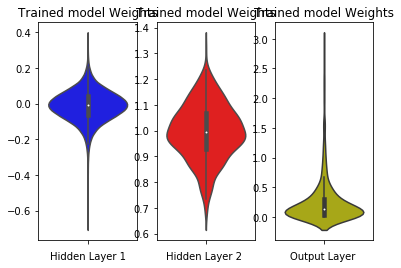

In [72]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [0]:
from prettytable import PrettyTable

In [0]:
x = PrettyTable()

In [0]:
x.field_names = ['Model', 'Test Score/Loss', 'Test Accuracy']

In [0]:
x.add_row(['2-layer', '0.089','98.02%'])
x.add_row(['2-layer + BN', '0.083','98.03%'])
x.add_row(['2-layer +BN +Dropout', '0.066','98.11%'])

x.add_row(['3-layer', '0.0917','98.02%'])
x.add_row(['3-layer + BN', '0.088','98.03%'])
x.add_row(['3-layer +BN +Dropout', '0.0606','98.11%'])

x.add_row(['5-layer', '0.083','98.21%'])
x.add_row(['5-layer + BN', '0.082','97.92%'])
x.add_row(['5-layer +BN +Dropout', '0.085','98.1%'])

In [0]:
print(x)




+----------------------+-----------------+---------------+
|        Model         | Test Score/Loss | Test Accuracy |
+----------------------+-----------------+---------------+
|       2-layer        |      0.089      |     98.02%    |
|     2-layer + BN     |      0.083      |     98.03%    |
| 2-layer +BN +Dropout |      0.066      |     98.11%    |
|       3-layer        |      0.0917     |     98.02%    |
|     3-layer + BN     |      0.088      |     98.03%    |
| 3-layer +BN +Dropout |      0.0606     |     98.11%    |
|       5-layer        |      0.083      |     98.21%    |
|     5-layer + BN     |      0.082      |     97.92%    |
| 5-layer +BN +Dropout |      0.085      |     98.1%     |
+----------------------+-----------------+---------------+


<h1>USING sigmoid(activation function) and glorot_normaal as initializer </h1>

<h1>A) Using sgd optimizer 

<h1>Model - 10</h1>


In [0]:
from keras.initializers import glorot_normal


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/step - loss: 2.3049 - acc: 0.1345 - val_loss: 2.2491 - val_acc: 0.3149
Epoch 2/20
60000/60000 [==============================] - 3

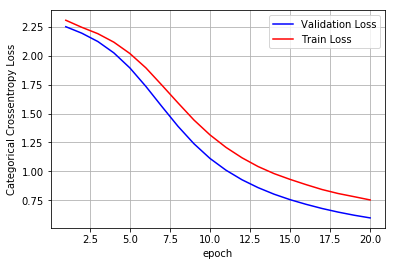

In [19]:
#activation func - sigmoid
#weight initializer - glorot normal
#optimizer - sgd
# no.of layers = 2
#added dropout to avoid overfitting
#didn't add BN as there are only two layers in this model



model = Sequential()
model.add(Dense(256, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None), input_shape=(input_dim,))) #layer1
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None))) #layer2 
model.add(Dense(output_dim, activation = 'softmax')) #softmax

model.summary()

model. compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])


history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

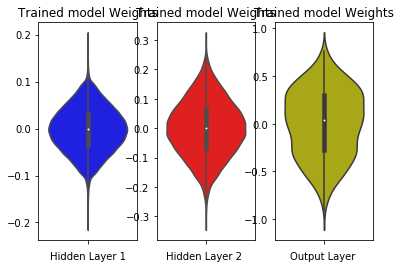

In [20]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1> Model -11 </h1>

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)              

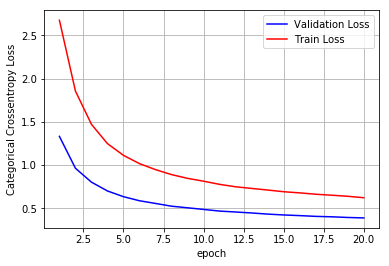

In [21]:
#activation func - sigmoid
#weight initializer - glorot normal
#optimizer - sgd
# no.of layers = 3
#added dropout to avoid overfitting
#applied BN in the deeper layers 

model = Sequential()
model.add(Dense(512, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None), input_shape=(input_dim,))) #layer1
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None))) #layer2 
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None))) #layer3
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation = 'softmax')) #softmax

model.summary()

model. compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])


history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

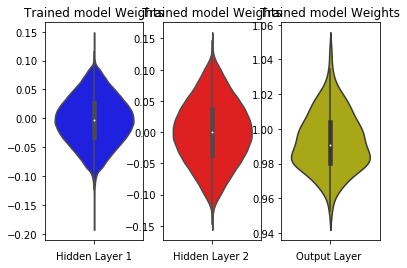

In [22]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1> Model 12 </h1>

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)              

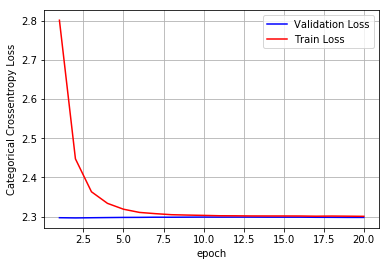

In [23]:
#activation func - sigmoid
#weight initializer - glorot_normal
#optimizer - sgd
# no.of layers = 5
#added dropout to avoid overfitting
#applied BN in the deeper layers 



model = Sequential()
model.add(Dense(512, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None), input_shape=(input_dim,))) #layer1
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None))) #layer2 
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None))) #layer3
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None))) #layer4
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None))) #layer5
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation = 'softmax')) #softmax

model.summary()

model. compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])


history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

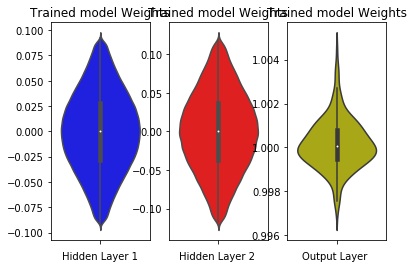

In [24]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1>B) using adam optimizer

<h1> Model 13

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.8203 - acc: 0.7862 - val_loss: 0.3193 - val_acc: 0.9135
Epoch 2/20
60000/60000 [==============================] - 4

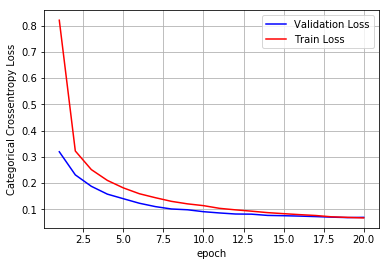

In [27]:
#activation func - sigmoid
#weight initializer - glorot normal
#optimizer - adam
# no.of layers = 2
#added dropout to avoid overfitting
#didn't add BN as there are only two layers in this model



model = Sequential()
model.add(Dense(256, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None), input_shape=(input_dim,))) #layer1
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None))) #layer2 
model.add(Dense(output_dim, activation = 'softmax')) #softmax

model.summary()

model. compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

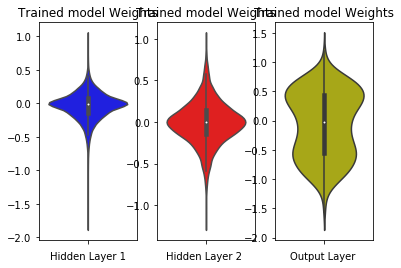

In [28]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1> Model 14

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)              

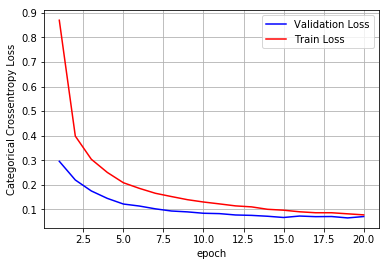

In [29]:
#activation func - sigmoid
#weight initializer - glorot normal
#optimizer - adam
# no.of layers = 3
#added dropout to avoid overfitting
#applied BN in the deeper layers 

model = Sequential()
model.add(Dense(512, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None), input_shape=(input_dim,))) #layer1
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None))) #layer2 
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None))) #layer3
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation = 'softmax')) #softmax

model.summary()

model. compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

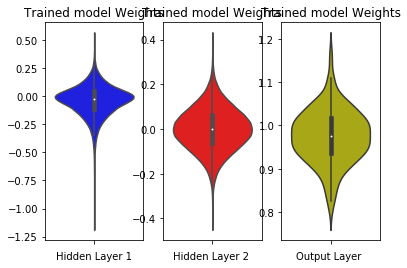

In [30]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1> Model 15

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)              

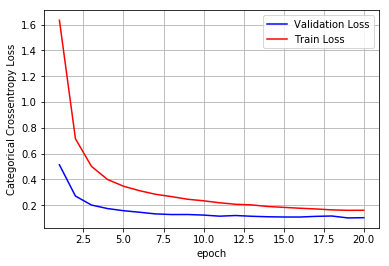

In [25]:
#activation func - sigmoid
#weight initializer - glorot_normal
#optimizer - adam
# no.of layers = 5
#added dropout to avoid overfitting
#applied BN in the deeper layers 



model = Sequential()
model.add(Dense(512, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None), input_shape=(input_dim,))) #layer1
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None))) #layer2 
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None))) #layer3
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None))) #layer4
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'sigmoid',kernel_initializer = glorot_normal(seed= None))) #layer5
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation = 'softmax')) #softmax

model.summary()

model. compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

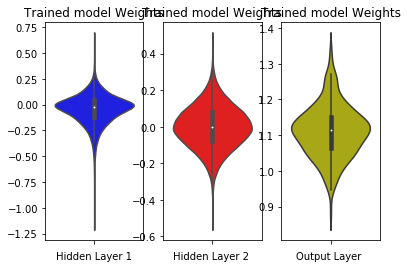

In [26]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [74]:
from prettytable import PrettyTable

x=PrettyTable()

x.field_names = ['Model', 'optimizer','Test Score/Loss', 'Test Accuracy']
x.add_row(['sigmoid + glorot','sgd' ,'0.599','84.14%'])
x.add_row(['sigmoid + glorot','sgd' ,'0.388','88.34%'])
x.add_row(['sigmoid + glorot','sgd' ,'2.29','11.35%'])
x.add_row(['sigmoid + glorot','adam' ,'0.069','97.85%'])
x.add_row(['sigmoid + glorot','adam' ,'0.709','97.97%'])
x.add_row(['sigmoid + glorot','adam' ,'0.104','97.78%'])

print(x)

+------------------+-----------+-----------------+---------------+
|      Model       | optimizer | Test Score/Loss | Test Accuracy |
+------------------+-----------+-----------------+---------------+
| sigmoid + glorot |    sgd    |      0.599      |     84.14%    |
| sigmoid + glorot |    sgd    |      0.388      |     88.34%    |
| sigmoid + glorot |    sgd    |       2.29      |     11.35%    |
| sigmoid + glorot |    adam   |      0.069      |     97.85%    |
| sigmoid + glorot |    adam   |      0.709      |     97.97%    |
| sigmoid + glorot |    adam   |      0.104      |     97.78%    |
+------------------+-----------+-----------------+---------------+


<h1> Conclusion

In this entire project different models were trained on mnist dataset with different optimizers, weight initilizer and activation function.

What i can conclude from this project is-

1) adam optimiser, though takes a little more time to run, provides a much better accuracy than sgd. 

2) also two diferent prettytables lead me to conclude that relu activation function , though not with a very big margin, performs better than sigmoid.